In [1]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emelinevanderbeken","key":"fdef7825bb20ad21c25fc469ea16f6fd"}'}

In [2]:
 ! mkdir ~/.kaggle 
 ! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 48.5MB/s]
 61% 16.0M/26.3M [00:00<00:00, 60.7MB/s]
100% 26.3M/26.3M [00:00<00:00, 104MB/s] 
 43% 10.0M/23.4M [00:00<00:00, 104MB/s]
100% 23.4M/23.4M [00:00<00:00, 115MB/s]
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 95.0MB/s]


In [5]:
! mkdir data
! unzip train.csv.zip -d data

Archive:  train.csv.zip
  inflating: data/train.csv          


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

In [8]:
filepath='data/train.csv'
data_train_init = pd.read_csv(filepath)
df_train = data_train_init.copy()

In [16]:
X = df_train['comment_text']
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [17]:
categories=['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
y = df_train[categories]
y


,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [18]:
data_train,data_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [19]:
from keras.preprocessing.text import Tokenizer
from keras import preprocessing
from keras import models
from keras import layers
import matplotlib.pyplot as plt
maxlen = 500
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_train)

In [20]:
sequences_data_train = tokenizer.texts_to_sequences(data_train)
sequences_data_test = tokenizer.texts_to_sequences(data_test)
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens.")

Found 176036 unique tokens.


In [22]:
X_train = preprocessing.sequence.pad_sequences(sequences_data_train,maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(sequences_data_test,maxlen=maxlen)
print(X_train.shape)
print(X_test.shape)

(119678, 500)
(39893, 500)


In [30]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Flatten, Dense, LSTM, Bidirectional, Dropout
def training_model(model,X_train,y_train,X_test,y_test):
  history = model.fit(X_train,y_train,epochs=10,batch_size=500,validation_data=(X_test, y_test))
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1,len(acc) +1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  return history

In [31]:
model1 = Sequential()
model1.add(Embedding(max_words, 100, input_length=maxlen))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.1))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(6,activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                12864     
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 390       
Total params: 1,174,054
Trainable params: 1,174,054
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
240/240 [==============================] - 123s 497ms/step - loss: 0.0935 - acc: 0.9460 - val_loss: 0.0710 - val_acc: 0.9936
Epoch 2/10
240/240 [==============================] - 118s 491ms/step - loss: 0.0525 - acc: 0.9943 - val_loss: 0.0575 - val_acc: 0.9936
Epoch 3/10
240/240 [==============================] - 118s 493ms/step - loss: 0.0491 - acc: 0.9944 - val_loss: 0.0513 - val_acc: 0.9936
Epoch 4/10
240/240 [==============================] - 118s 493ms/step - loss: 0.0476 - acc: 0.9943 - val_loss: 0.0502 - val_acc: 0.9936
Epoch 5/10
240/240 [==============================] - 118s 492ms/step - loss: 0.0470 - acc: 0.9943 - val_loss: 0.0532 - val_acc: 0.9936
Epoch 6/10
240/240 [==============================] - 118s 491ms/step - loss: 0.0450 - acc: 0.9942 - val_loss: 0.0510 - val_acc: 0.9936
Epoch 7/10
240/240 [==============================] - 118s 492ms/step - loss: 0.0437 - acc: 0.9941 - val_loss: 0.0492 - val_acc: 0.9932
Epoch 8/10
240/240 [============================

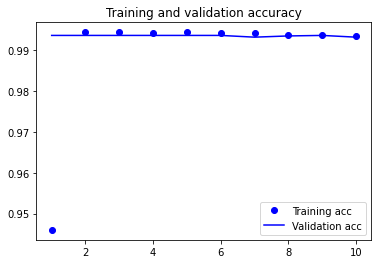

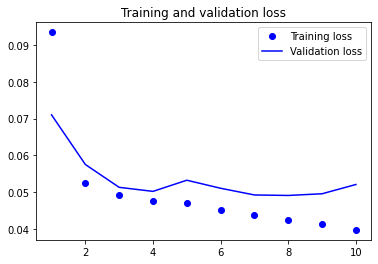

In [32]:
training_model(model1,X_train,y_train,X_test,y_test)

In [37]:
from sklearn.metrics import f1_score

def compute_f1_score(y_test, y_pred, categories):
    print("f1 score (test dataset) = {}".format(f1_score(y_test, y_pred, average='weighted')))
    f1_score_cat=[f1_score(y_test.iloc[:,count],y_pred[:,count], 
                           average='weighted') for count in range(len(categories))]
    dic={category:f1Score for category,f1Score in zip(categories,f1_score_cat)}
    return pd.Series(data=dic,index=categories,name='f1_score')

In [38]:
y_test_pred = model1.predict(X_test)
y_test_pred

array([[9.9819270e-05, 1.8034162e-09, 1.4831591e-05, 3.4956251e-08,
        6.1013743e-06, 1.1560705e-06],
       [2.1846169e-03, 8.8611210e-07, 7.8768475e-04, 6.8447475e-06,
        3.3991854e-04, 4.5879569e-05],
       [2.7467218e-01, 1.5560667e-04, 2.6711749e-02, 2.0707300e-04,
        2.9040609e-02, 1.5050396e-03],
       ...,
       [1.4180591e-04, 2.2480422e-09, 1.9340376e-05, 3.6859380e-08,
        6.4528012e-06, 1.1210974e-06],
       [2.4859740e-03, 3.4033232e-07, 3.5963207e-04, 5.1138800e-06,
        1.9018633e-04, 4.1207957e-05],
       [6.2596504e-05, 9.4999286e-10, 1.1337932e-05, 1.7555463e-08,
        4.2568340e-06, 6.6530879e-07]], dtype=float32)

In [39]:
y_test_pred[y_test_pred>=0.5] = 1
y_test_pred[y_test_pred<0.5] = 0
y_test_pred

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
f1_results = compute_f1_score(y_test, y_test_pred, categories)
f1_results

f1 score (test dataset) = 0.7012674418696027


toxic            0.962012
severe_toxic     0.987946
obscene          0.979807
threat           0.995866
insult           0.968698
identity_hate    0.987031
Name: f1_score, dtype: float64